In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo visual dos gráficos
sns.set_theme(style="whitegrid")

# Carregando o dataset 'penguins' e removendo nulos (como na Semana 1)
df_penguins = sns.load_dataset("penguins")
df_penguins_clean = df_penguins.dropna()

print(df_penguins_clean.shape)
print(df_penguins_clean.head())

(333, 7)
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


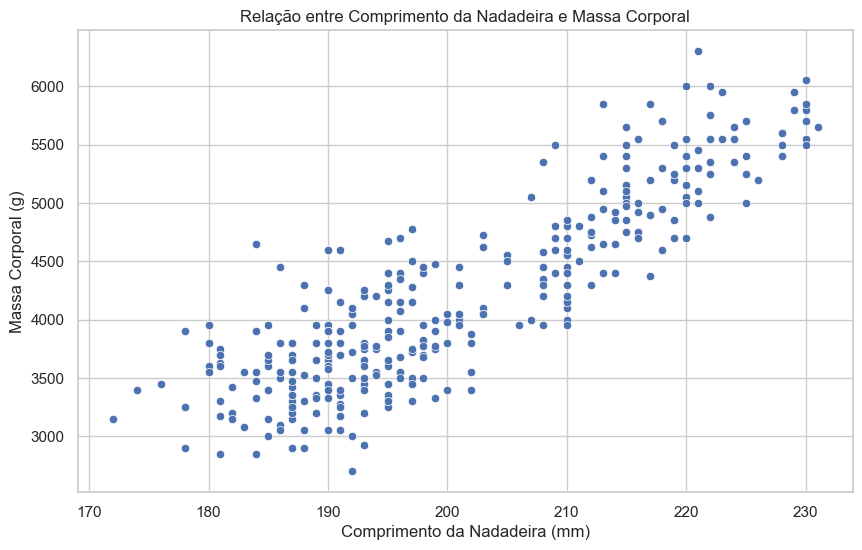

In [3]:
# Visualização: Gráfico de Dispersão (Scatterplot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_penguins_clean, x="flipper_length_mm", y="body_mass_g")

plt.title("Relação entre Comprimento da Nadadeira e Massa Corporal")
plt.xlabel("Comprimento da Nadadeira (mm)")
plt.ylabel("Massa Corporal (g)")
plt.show()

In [4]:
# Métrica: Correlação de Pearson (r)
# Vamos calcular a correlação entre TODAS as variáveis numéricas
df_numeric = df_penguins_clean.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr()

print("\n--- Matriz de Correlação ---")
print(correlation_matrix)


--- Matriz de Correlação ---
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


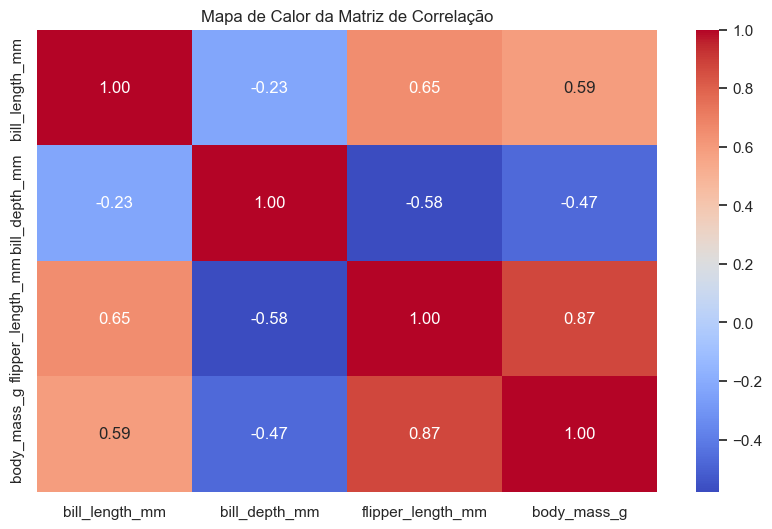

In [5]:
# É muito mais fácil ver isso em um Mapa de Calor (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# annot=True escreve os números dentro dos quadrados
# cmap="coolwarm" usa cores (Vermelho=Positivo, Azul=Negativo)
# fmt=".2f" formata com 2 casas decimais
plt.title("Mapa de Calor da Matriz de Correlação")
plt.show()

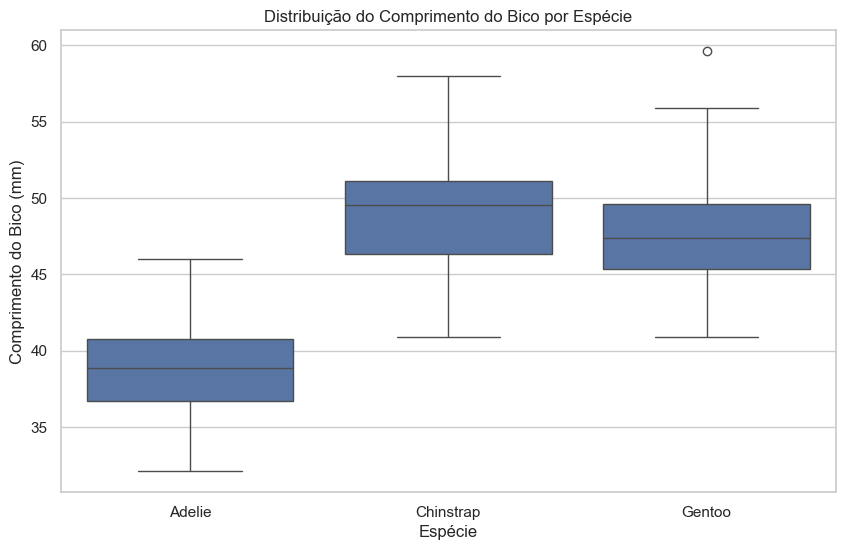

In [6]:
# Visualização: Boxplot Agrupado
plt.figure(figsize=(10,6))
sns.boxplot(data=df_penguins_clean, x="species", y="bill_length_mm")

plt.title("Distribuição do Comprimento do Bico por Espécie")
plt.xlabel("Espécie")
plt.ylabel("Comprimento do Bico (mm)")
plt.show()


In [7]:
# Métrica: Podemos calcular a mediana por grupo
print("\n--- Mediana do Comprimento do Bico por Espécie ---")
print(df_penguins_clean.groupby("species")["bill_length_mm"].median())


--- Mediana do Comprimento do Bico por Espécie ---
species
Adelie       38.85
Chinstrap    49.55
Gentoo       47.40
Name: bill_length_mm, dtype: float64


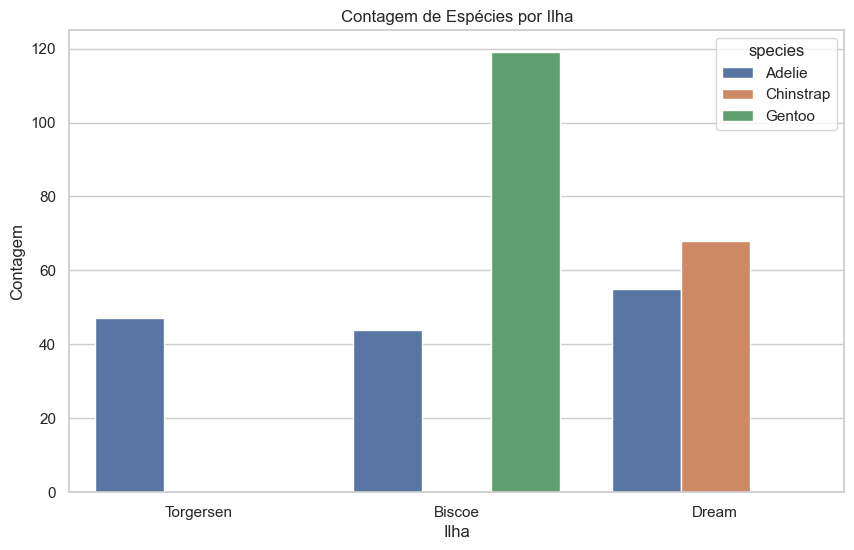

In [8]:
# Visualização: Gráfico de Contagem (Countplot)
plt.figure(figsize=(10,6))
# Usamos 'hue' para adicionar a segunda variável categórica
sns.countplot(data=df_penguins_clean, x="island", hue="species")

plt.title("Contagem de Espécies por Ilha")
plt.xlabel("Ilha")
plt.ylabel("Contagem")
plt.show()

In [9]:
# Métrica: Tabela de Contingência (Crosstab)
# O pandas faz isso facilmente
crosstab_result = pd.crosstab(df_penguins_clean['island'], df_penguins_clean['species'])

print("\n--- Tabela de Contingência (Ilha vs. Espécie) ---")
print(crosstab_result)


--- Tabela de Contingência (Ilha vs. Espécie) ---
species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     119
Dream          55         68       0
Torgersen      47          0       0


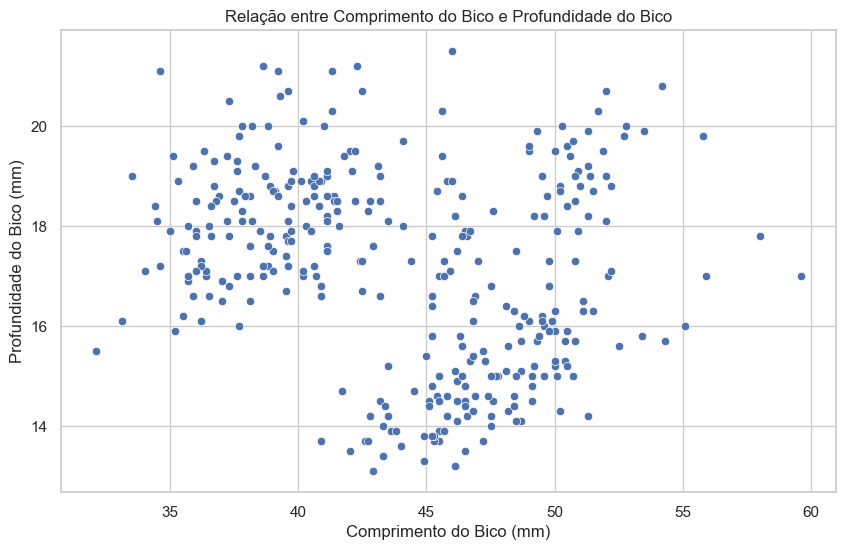

In [ ]:
# Exercício prático
# Um colega biólogo quer saber se existe uma relação entre a profundidade do bico (bill_depth_mm) e o comprimento do bico (bill_length_mm).
# Ele suspeita que pinguins com bicos mais longos (comprimento) tenham bicos menos profundos (profundidade).

# Essa será uma análise Num-Num

# Visualização: Gráfico de Dispersão (Scatterplot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_penguins_clean, x="bill_length_mm", y="bill_depth_mm")

plt.title("Relação entre Comprimento do Bico e Profundidade do Bico")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Profundidade do Bico (mm)")
plt.show()

# Como vemos no gráfico de dispersão e no mapa de calor da matriz correlação gerado mais acima, há uma certa correlação negativa.
# Logo, pinguins com bicos mais longos teria bicos menos profundos, mas a relação é muito fraca: -0,23.

<Figure size 1000x600 with 0 Axes>

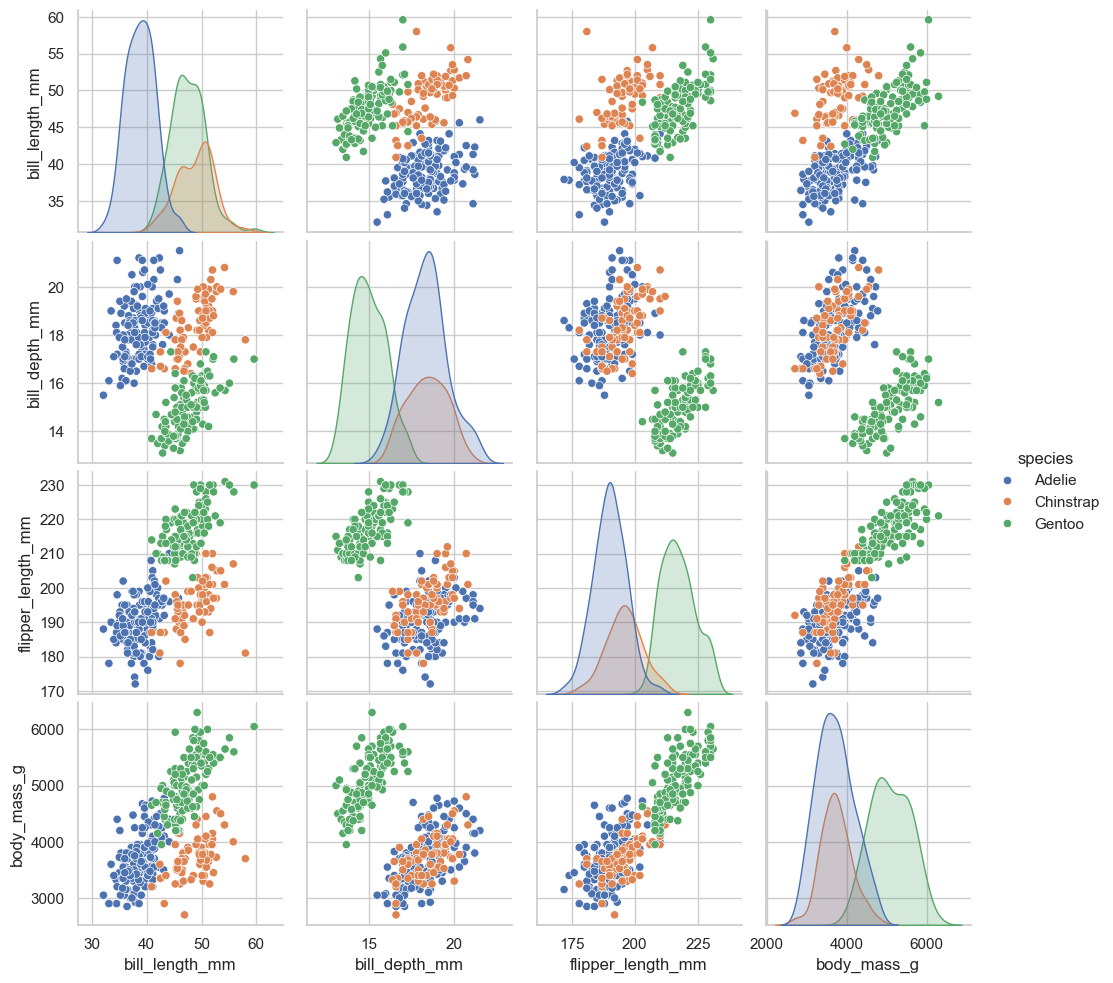

In [ ]:
# Extensão
# O Gráfico "Tudo-em-Um": O Seaborn tem um comando "mágico" para análise exploratória bivariada.

# Visualização: pairplot
plt.figure(figsize=(10,6))
sns.pairplot(data=df_penguins_clean, hue="species")

plt.show()

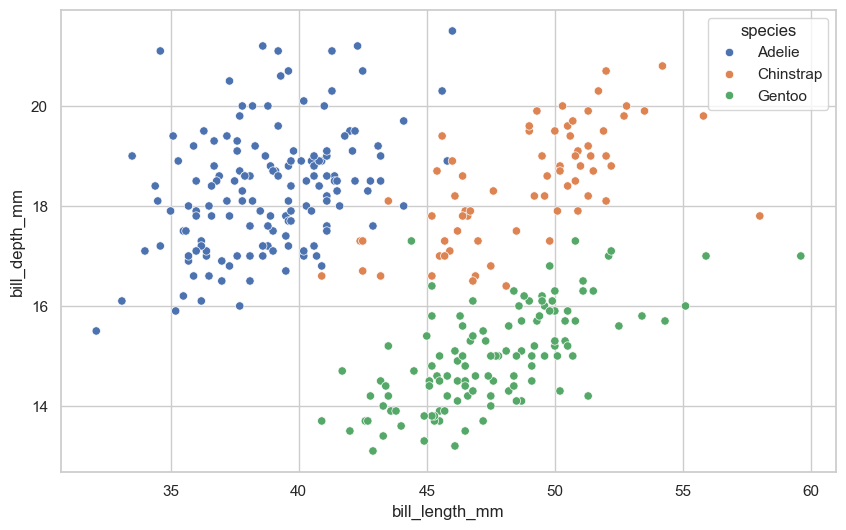

In [ ]:
# Extensão
# Aprofundando no Scatterplot: Adicione a variável species ao seu scatterplot do exercício prático usando o parâmetro hue.

# Visualização: Gráfico de Dispersão (Scatterplot) com a variável categórica "species"
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_penguins_clean, x="bill_length_mm", y="bill_depth_mm", hue="species")

plt.show()

# Aqui se vê que a relação muda, pois dá para notar uma correlação positiva dentro de cada espécie. Mostrando assim, que os bicos mais longos tendem a ser mais profundos. A relação negativa (-0.23) era, na verdade, um paradoxo estatístico (Paradoxo de Simpson)